In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

In [63]:
training_data = {
    'epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    'train_loss': [0.2724, 0.0920, 0.0792, 0.0709, 0.0644, 0.0592, 0.0549, 0.0513, 0.0490, 0.0475, 0.0616, 0.0599, 0.0577, 0.0556],
    'val_loss': [0.1114, 0.1207, 0.0954, 0.0869, 0.0830, 0.0823, 0.0813, 0.0855, 0.0817, 0.0807, 0.0948, 0.0872, 0.0825, 0.0834],
    'val_miou': [0.3253, 0.3188, 0.3608, 0.3677, 0.3884, 0.3947, 0.3963, 0.3864, 0.3959, 0.3994, 0.3719, 0.3721, 0.3858, 0.3939],
    'learning_rate': [9.76e-05, 9.05e-05, 7.96e-05, 6.58e-05, 5.05e-05, 3.52e-05, 2.14e-05, 1.05e-05, 3.42e-06, 1.00e-04, 9.94e-05, 9.76e-05, 9.46e-05, 9.05e-05],
    'patience': [0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 3, 4],
    'best_model': [True, False, True, True, True, True, True, False, False, True, False, False, False, False]
}

In [64]:
class_iou_data = np.array([
    [0.2409, 0.3611, 0.1796, 0.3439, 0.1572, 0.6293, 0.4227, 0.2677],  # Epoch 1
    [0.2512, 0.2889, 0.2139, 0.3002, 0.1374, 0.6348, 0.4039, 0.3197],  # Epoch 2
    [0.2799, 0.4747, 0.2483, 0.3362, 0.2018, 0.6308, 0.4149, 0.2998],  # Epoch 3
    [0.2978, 0.5063, 0.2178, 0.3438, 0.2602, 0.6417, 0.3548, 0.3189],  # Epoch 4
    [0.3045, 0.5121, 0.2473, 0.3680, 0.2199, 0.6916, 0.4296, 0.3345],  # Epoch 5
    [0.3015, 0.5266, 0.2627, 0.3843, 0.2551, 0.6813, 0.4101, 0.3362],  # Epoch 6
    [0.3199, 0.5243, 0.2516, 0.3792, 0.2418, 0.6979, 0.4204, 0.3353],  # Epoch 7
    [0.3014, 0.5121, 0.2465, 0.3715, 0.2256, 0.7004, 0.4064, 0.3278],  # Epoch 8
    [0.3185, 0.5139, 0.2564, 0.3864, 0.2605, 0.6984, 0.3979, 0.3349],  # Epoch 9
    [0.3249, 0.5250, 0.2527, 0.3852, 0.2562, 0.7028, 0.4185, 0.3296],  # Epoch 10
    [0.3023, 0.4667, 0.2363, 0.3279, 0.2205, 0.6931, 0.4084, 0.3200],  # Epoch 11
    [0.2790, 0.4696, 0.2456, 0.3680, 0.2410, 0.6679, 0.4246, 0.2808],  # Epoch 12
    [0.2765, 0.5223, 0.2490, 0.3733, 0.2306, 0.6770, 0.4282, 0.3296],  # Epoch 13
    [0.3185, 0.5160, 0.2392, 0.3564, 0.2391, 0.6979, 0.4745, 0.3095],  # Epoch 14
])

In [65]:
class_names = [
    "double_plant",
    "drydown",
    "endrow",
    "nutrient_deficiency",
    "waterway",
    "water",
    "planter_skip",
    "weed_cluster",
]

In [66]:
df = pd.DataFrame(training_data)

# Display structured data

In [67]:
print("="*60)
print("STRUCTURED TRAINING DATA")
print("="*60)
print(df.to_string(index=False))
print("\n")

STRUCTURED TRAINING DATA
 epoch  train_loss  val_loss  val_miou  learning_rate  patience  best_model
     1      0.2724    0.1114    0.3253       0.000098         0        True
     2      0.0920    0.1207    0.3188       0.000091         1       False
     3      0.0792    0.0954    0.3608       0.000080         0        True
     4      0.0709    0.0869    0.3677       0.000066         0        True
     5      0.0644    0.0830    0.3884       0.000051         0        True
     6      0.0592    0.0823    0.3947       0.000035         0        True
     7      0.0549    0.0813    0.3963       0.000021         0        True
     8      0.0513    0.0855    0.3864       0.000010         1       False
     9      0.0490    0.0817    0.3959       0.000003         2       False
    10      0.0475    0.0807    0.3994       0.000100         0        True
    11      0.0616    0.0948    0.3719       0.000099         1       False
    12      0.0599    0.0872    0.3721       0.000098         2

In [68]:
# Summary statistics
print("="*60)
print("TRAINING SUMMARY")
print("="*60)
print(f"Total Epochs Completed: {len(df)}")
print(f"Best Validation mIoU: {df['val_miou'].max():.4f} (Epoch {df['val_miou'].idxmax() + 1})")
print(f"Final Train Loss: {df['train_loss'].iloc[-1]:.4f}")
print(f"Final Val Loss: {df['val_loss'].iloc[-1]:.4f}")
print(f"Current Patience: {df['patience'].iloc[-1]}/10")
print(f"Train Loss Improvement: {((df['train_loss'].iloc[0] - df['train_loss'].iloc[-1]) / df['train_loss'].iloc[0] * 100):.1f}%")
print(f"mIoU Improvement: {((df['val_miou'].iloc[-1] - df['val_miou'].iloc[0]) / df['val_miou'].iloc[0] * 100):.1f}%")
print("\n")

TRAINING SUMMARY
Total Epochs Completed: 14
Best Validation mIoU: 0.3994 (Epoch 10)
Final Train Loss: 0.0556
Final Val Loss: 0.0834
Current Patience: 4/10
Train Loss Improvement: 79.6%
mIoU Improvement: 21.1%




In [69]:
# Per-class statistics
class_df = pd.DataFrame(class_iou_data, columns=class_names, index=[f'Epoch {i+1}' for i in range(len(class_iou_data))])
print("="*60)
print("PER-CLASS IoU STATISTICS")
print("="*60)
print("\nAverage IoU per class:")
print(class_df.mean().to_string())
print("\nBest IoU per class:")
print(class_df.max().to_string())
print("\nWorst IoU per class:")
print(class_df.min().to_string())
print("\n")

PER-CLASS IoU STATISTICS

Average IoU per class:
double_plant           0.294057
drydown                0.479971
endrow                 0.239064
nutrient_deficiency    0.358879
waterway               0.224779
water                  0.674636
planter_skip           0.415350
weed_cluster           0.317450

Best IoU per class:
double_plant           0.3249
drydown                0.5266
endrow                 0.2627
nutrient_deficiency    0.3864
waterway               0.2605
water                  0.7028
planter_skip           0.4745
weed_cluster           0.3362

Worst IoU per class:
double_plant           0.2409
drydown                0.2889
endrow                 0.1796
nutrient_deficiency    0.3002
waterway               0.1374
water                  0.6293
planter_skip           0.3548
weed_cluster           0.2677




# CREATE ALL VISUALIZATIONS

In [70]:
# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
colors = {'train': '#2ecc71', 'val': '#e74c3c', 'miou': '#3498db', 'lr': '#f39c12', 'best': '#9b59b6'}

# FIGURE 1: Comprehensive Training Dashboard

C:\Users\Max\AppData\Local\Temp\ipykernel_16872\4131794217.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
c:\Users\Max\AppData\Local\pypoetry\Cache\virtualenvs\agrinet-CSzAdQDi-py3.12\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


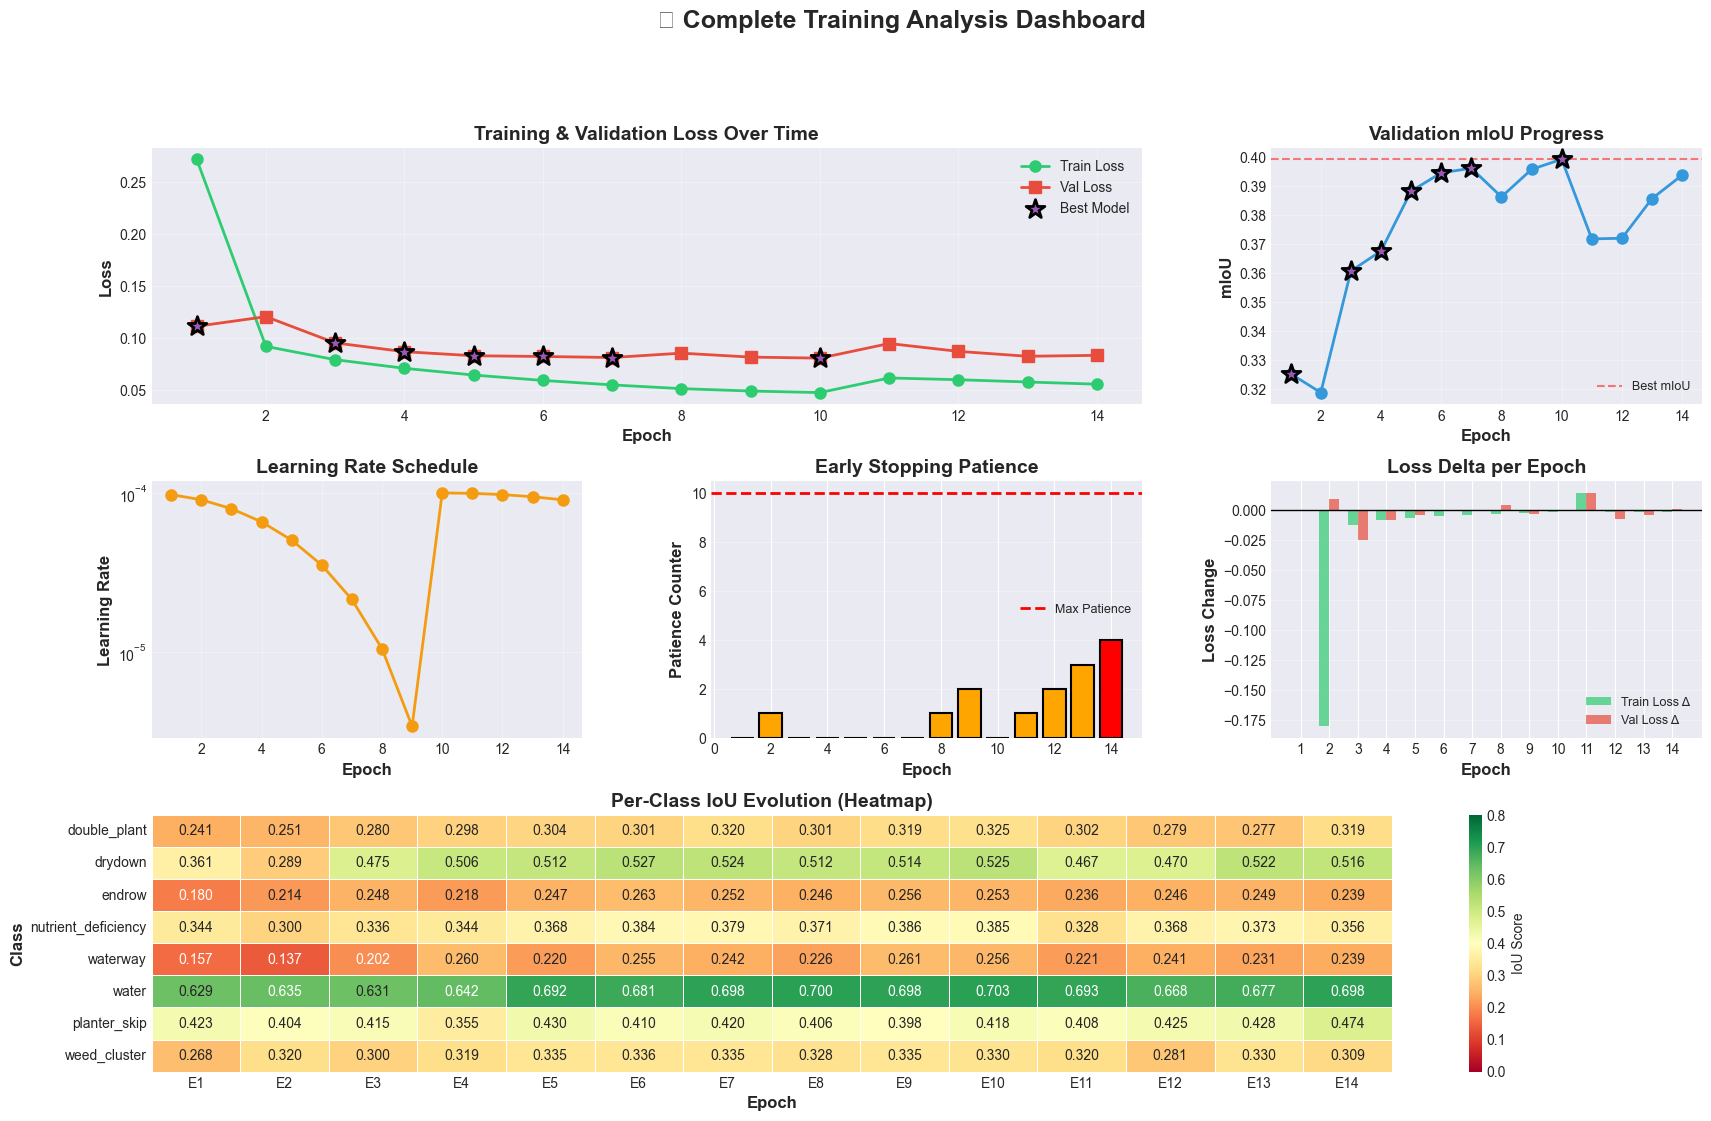

In [71]:
fig = plt.figure(figsize=(20, 12))
gs = GridSpec(3, 3, figure=fig, hspace=0.3, wspace=0.3)

# 1. Training and Validation Loss
ax1 = fig.add_subplot(gs[0, :2])
ax1.plot(df['epoch'], df['train_loss'], marker='o', linewidth=2, markersize=8, 
         label='Train Loss', color=colors['train'])
ax1.plot(df['epoch'], df['val_loss'], marker='s', linewidth=2, markersize=8, 
         label='Val Loss', color=colors['val'])
best_epochs = df[df['best_model']]['epoch']
ax1.scatter(best_epochs, df[df['best_model']]['val_loss'], 
           color=colors['best'], s=200, marker='*', zorder=5, 
           label='Best Model', edgecolors='black', linewidth=2)
ax1.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax1.set_ylabel('Loss', fontsize=12, fontweight='bold')
ax1.set_title('Training & Validation Loss Over Time', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# 2. Validation mIoU
ax2 = fig.add_subplot(gs[0, 2])
ax2.plot(df['epoch'], df['val_miou'], marker='o', linewidth=2, markersize=8, 
         color=colors['miou'])
ax2.scatter(best_epochs, df[df['best_model']]['val_miou'], 
           color=colors['best'], s=200, marker='*', zorder=5, 
           edgecolors='black', linewidth=2)
ax2.axhline(y=df['val_miou'].max(), color='red', linestyle='--', alpha=0.5, label='Best mIoU')
ax2.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax2.set_ylabel('mIoU', fontsize=12, fontweight='bold')
ax2.set_title('Validation mIoU Progress', fontsize=14, fontweight='bold')
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)

# 3. Learning Rate Schedule
ax3 = fig.add_subplot(gs[1, 0])
ax3.plot(df['epoch'], df['learning_rate'], marker='o', linewidth=2, markersize=8, 
         color=colors['lr'])
ax3.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax3.set_ylabel('Learning Rate', fontsize=12, fontweight='bold')
ax3.set_title('Learning Rate Schedule', fontsize=14, fontweight='bold')
ax3.set_yscale('log')
ax3.grid(True, alpha=0.3)

# 4. Patience Counter
ax4 = fig.add_subplot(gs[1, 1])
colors_patience = ['green' if p == 0 else 'orange' if p < 4 else 'red' for p in df['patience']]
ax4.bar(df['epoch'], df['patience'], color=colors_patience, edgecolor='black', linewidth=1.5)
ax4.axhline(y=10, color='red', linestyle='--', linewidth=2, label='Max Patience')
ax4.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax4.set_ylabel('Patience Counter', fontsize=12, fontweight='bold')
ax4.set_title('Early Stopping Patience', fontsize=14, fontweight='bold')
ax4.legend(fontsize=9)
ax4.grid(True, alpha=0.3, axis='y')

# 5. Loss Improvement Rate
ax5 = fig.add_subplot(gs[1, 2])
train_loss_delta = df['train_loss'].diff().fillna(0)
val_loss_delta = df['val_loss'].diff().fillna(0)
x_pos = np.arange(len(df['epoch']))
width = 0.35
ax5.bar(x_pos - width/2, train_loss_delta, width, label='Train Loss Δ', 
        color=colors['train'], alpha=0.7)
ax5.bar(x_pos + width/2, val_loss_delta, width, label='Val Loss Δ', 
        color=colors['val'], alpha=0.7)
ax5.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax5.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax5.set_ylabel('Loss Change', fontsize=12, fontweight='bold')
ax5.set_title('Loss Delta per Epoch', fontsize=14, fontweight='bold')
ax5.set_xticks(x_pos)
ax5.set_xticklabels(df['epoch'])
ax5.legend(fontsize=9)
ax5.grid(True, alpha=0.3, axis='y')

# 6. Per-Class IoU Heatmap
ax6 = fig.add_subplot(gs[2, :])
sns.heatmap(class_iou_data.T, annot=True, fmt='.3f', cmap='RdYlGn', 
            xticklabels=[f'E{i+1}' for i in range(len(df))],
            yticklabels=class_names, cbar_kws={'label': 'IoU Score'}, 
            ax=ax6, vmin=0, vmax=0.8, linewidths=0.5)
ax6.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax6.set_ylabel('Class', fontsize=12, fontweight='bold')
ax6.set_title('Per-Class IoU Evolution (Heatmap)', fontsize=14, fontweight='bold')

plt.suptitle('🚀 Complete Training Analysis Dashboard', fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# PLOT 2: Per-Class IoU Line Plots

C:\Users\Max\AppData\Local\Temp\ipykernel_16872\1048676086.py:19: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Max\AppData\Local\pypoetry\Cache\virtualenvs\agrinet-CSzAdQDi-py3.12\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


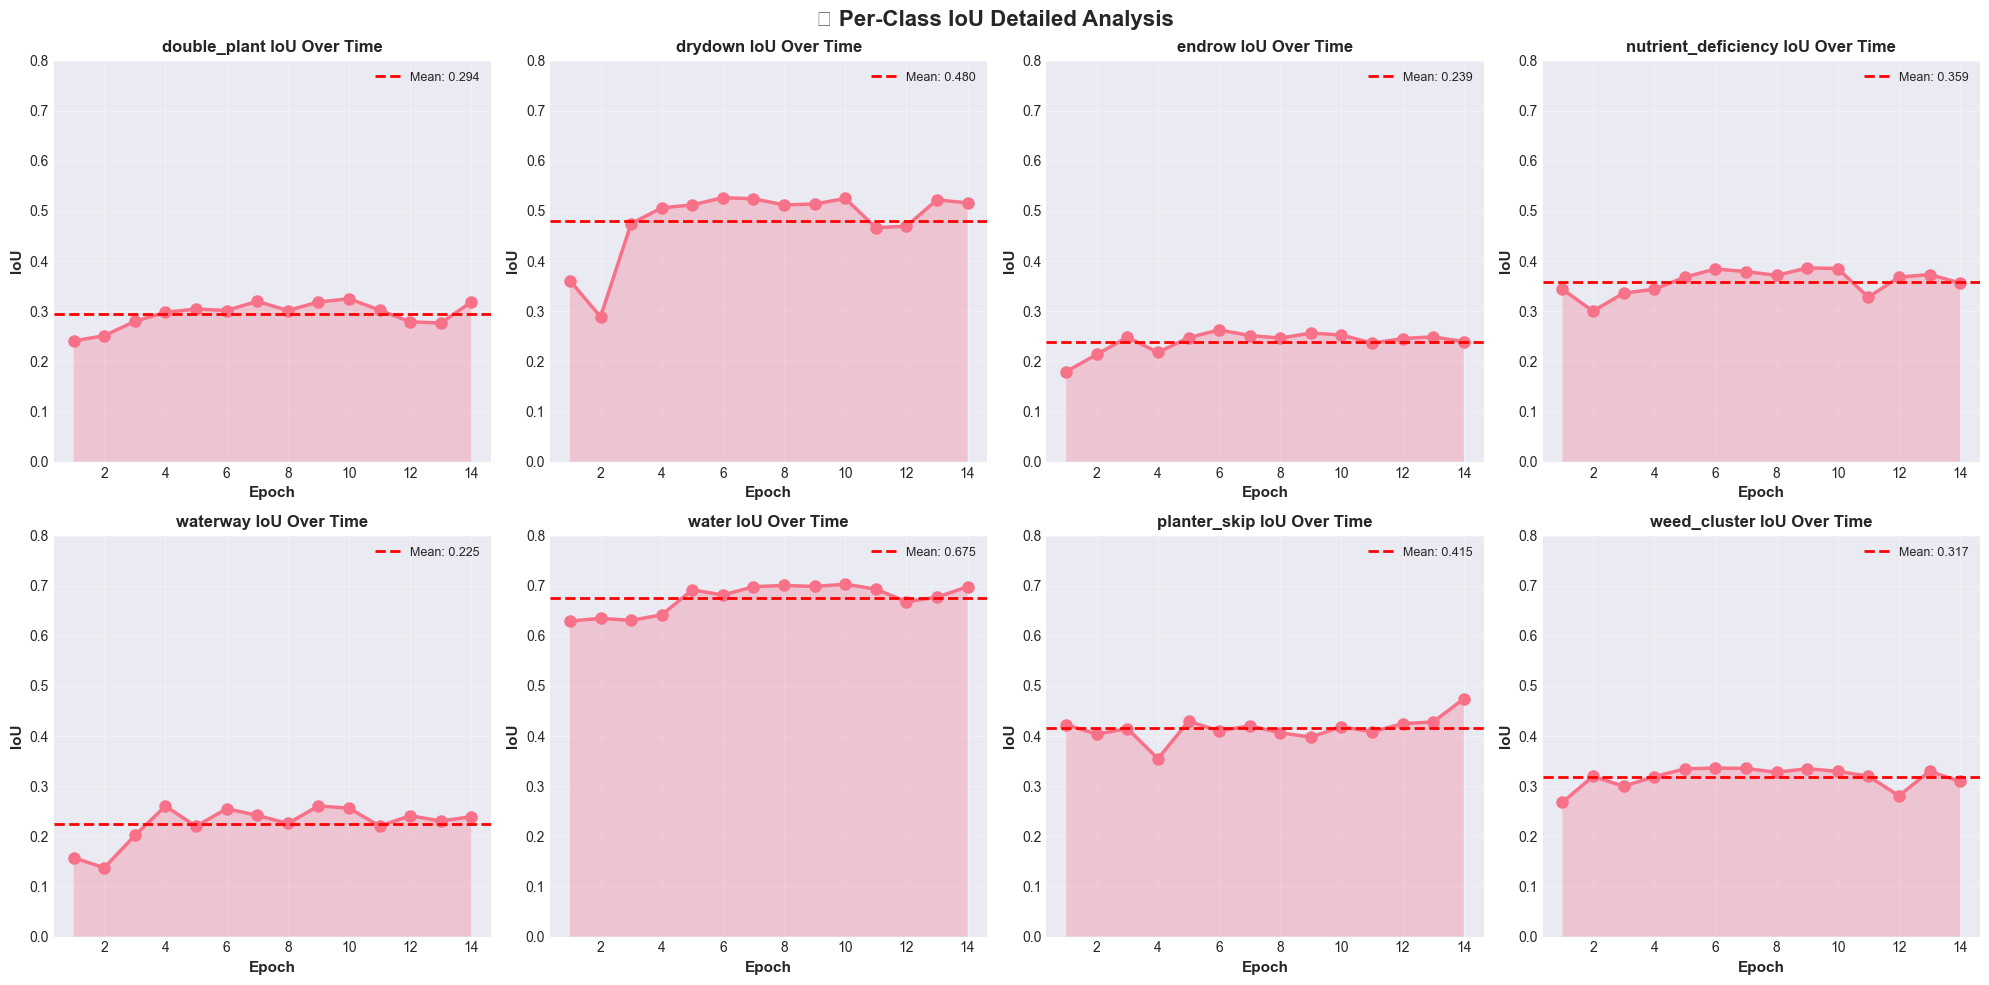

In [72]:
fig2, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, class_name in enumerate(class_names):
    ax = axes[idx]
    class_data = class_iou_data[:, idx]
    ax.plot(df['epoch'], class_data, marker='o', linewidth=2.5, markersize=8)
    ax.fill_between(df['epoch'], class_data, alpha=0.3)
    ax.axhline(y=class_data.mean(), color='red', linestyle='--', 
               linewidth=2, label=f'Mean: {class_data.mean():.3f}')
    ax.set_xlabel('Epoch', fontsize=11, fontweight='bold')
    ax.set_ylabel('IoU', fontsize=11, fontweight='bold')
    ax.set_title(f'{class_name} IoU Over Time', fontsize=12, fontweight='bold')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)
    ax.set_ylim([0, 0.8])

plt.suptitle('📊 Per-Class IoU Detailed Analysis', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# PLOT 3: Training Health Indicators

C:\Users\Max\AppData\Local\Temp\ipykernel_16872\1201821047.py:58: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Max\AppData\Local\Temp\ipykernel_16872\1201821047.py:58: UserWarning: Glyph 9878 (\N{SCALES}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Max\AppData\Local\Temp\ipykernel_16872\1201821047.py:58: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Max\AppData\Local\Temp\ipykernel_16872\1201821047.py:58: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Max\AppData\Local\Temp\ipykernel_16872\1201821047.py:58: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Max\AppData\Local\Temp\ipykernel_16872\1201821047.py:58: UserWarning: Glyph 127973 (\N{HOSPITAL}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Max\AppDa

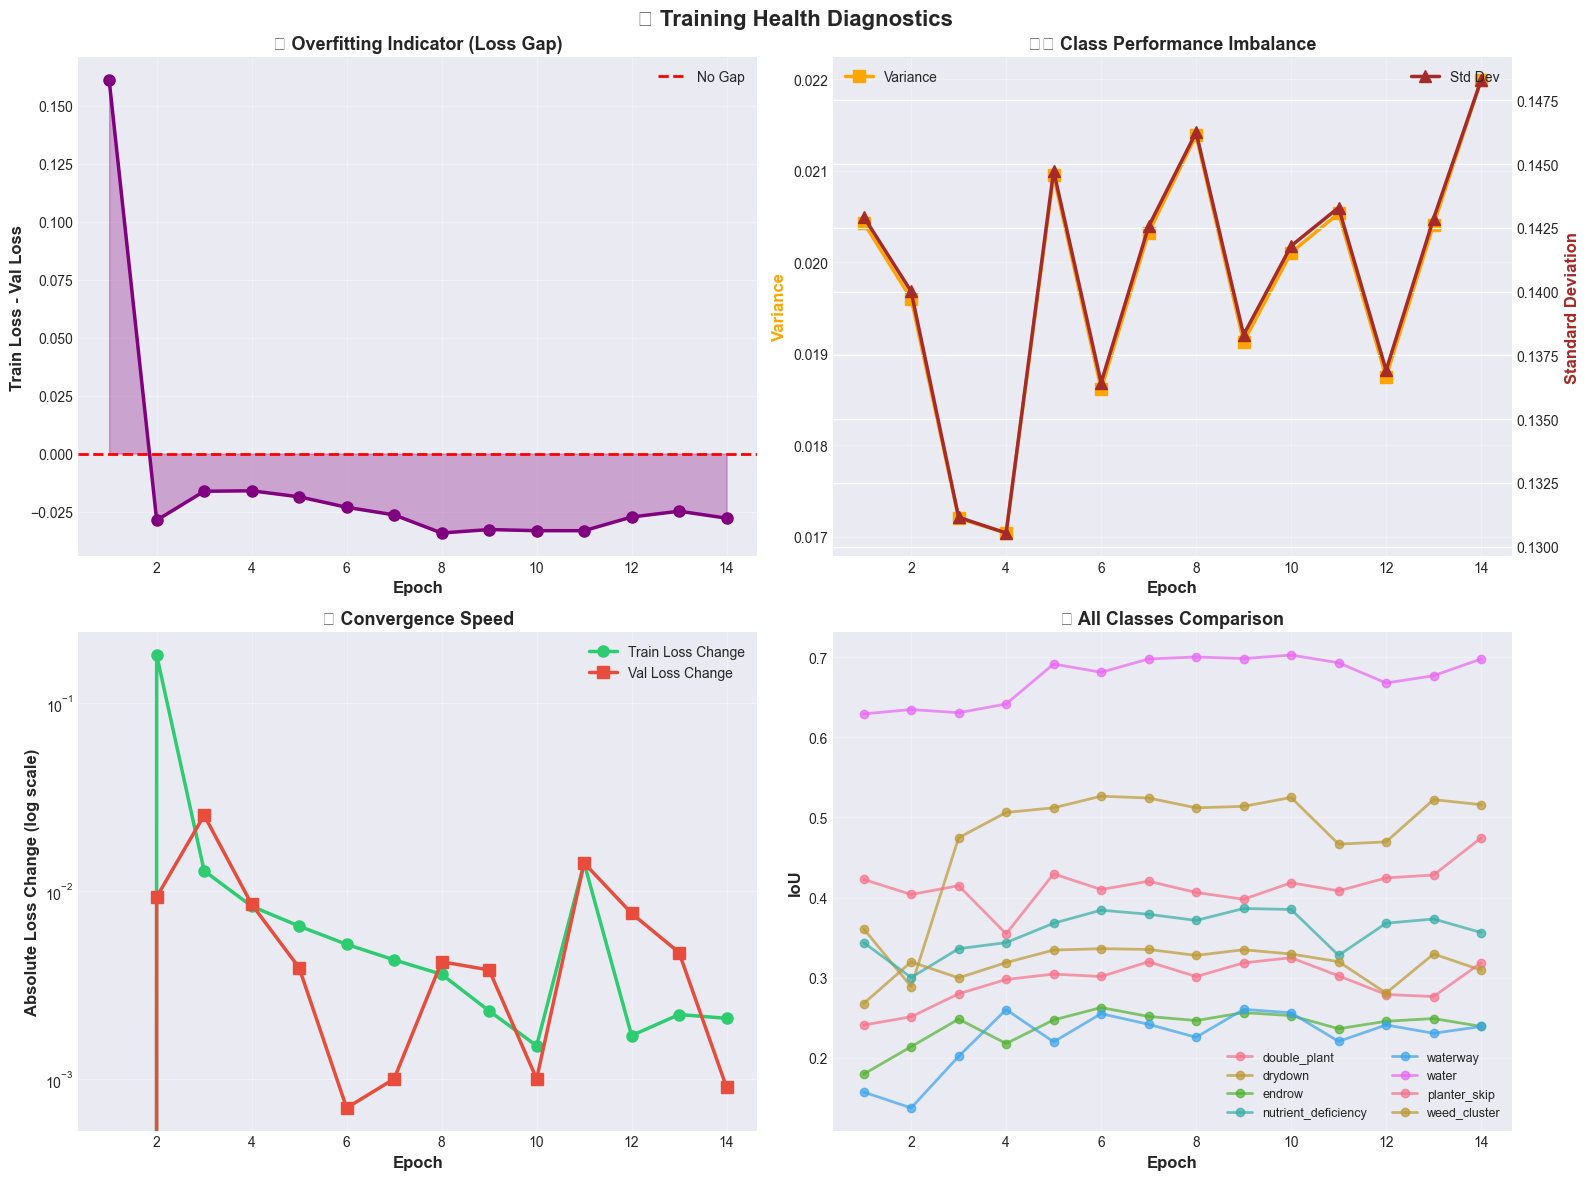

In [73]:
fig3, axes = plt.subplots(2, 2, figsize=(16, 12))

# Overfitting indicator (Train-Val Loss Gap)
ax1 = axes[0, 0]
loss_gap = df['train_loss'] - df['val_loss']
ax1.plot(df['epoch'], loss_gap, marker='o', linewidth=2.5, markersize=8, color='purple')
ax1.fill_between(df['epoch'], loss_gap, alpha=0.3, color='purple')
ax1.axhline(y=0, color='red', linestyle='--', linewidth=2, label='No Gap')
ax1.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax1.set_ylabel('Train Loss - Val Loss', fontsize=12, fontweight='bold')
ax1.set_title('🔍 Overfitting Indicator (Loss Gap)', fontsize=13, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Class performance variance
ax2 = axes[0, 1]
class_variance = np.var(class_iou_data, axis=1)
class_std = np.std(class_iou_data, axis=1)
ax2.plot(df['epoch'], class_variance, marker='s', linewidth=2.5, markersize=8, 
         color='orange', label='Variance')
ax2_twin = ax2.twinx()
ax2_twin.plot(df['epoch'], class_std, marker='^', linewidth=2.5, markersize=8, 
              color='brown', label='Std Dev')
ax2.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax2.set_ylabel('Variance', fontsize=12, fontweight='bold', color='orange')
ax2_twin.set_ylabel('Standard Deviation', fontsize=12, fontweight='bold', color='brown')
ax2.set_title('⚖️ Class Performance Imbalance', fontsize=13, fontweight='bold')
ax2.legend(loc='upper left', fontsize=10)
ax2_twin.legend(loc='upper right', fontsize=10)
ax2.grid(True, alpha=0.3)

# Convergence indicator (loss change magnitude)
ax3 = axes[1, 0]
train_change = np.abs(df['train_loss'].diff().fillna(0))
val_change = np.abs(df['val_loss'].diff().fillna(0))
ax3.semilogy(df['epoch'], train_change, marker='o', linewidth=2.5, markersize=8, 
             label='Train Loss Change', color=colors['train'])
ax3.semilogy(df['epoch'], val_change, marker='s', linewidth=2.5, markersize=8, 
             label='Val Loss Change', color=colors['val'])
ax3.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax3.set_ylabel('Absolute Loss Change (log scale)', fontsize=12, fontweight='bold')
ax3.set_title('📉 Convergence Speed', fontsize=13, fontweight='bold')
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3)

# Class ranking over time
ax4 = axes[1, 1]
for idx, class_name in enumerate(class_names):
    ax4.plot(df['epoch'], class_iou_data[:, idx], marker='o', linewidth=2, 
             markersize=6, label=class_name, alpha=0.7)
ax4.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax4.set_ylabel('IoU', fontsize=12, fontweight='bold')
ax4.set_title('🏆 All Classes Comparison', fontsize=13, fontweight='bold')
ax4.legend(fontsize=9, ncol=2)
ax4.grid(True, alpha=0.3)

plt.suptitle('🏥 Training Health Diagnostics', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# PLOT 4: Performance Summary

C:\Users\Max\AppData\Local\Temp\ipykernel_16872\3590906287.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax1.boxplot(class_iou_data, labels=class_names, patch_artist=True,


c:\Users\Max\AppData\Local\pypoetry\Cache\virtualenvs\agrinet-CSzAdQDi-py3.12\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  func(*args, **kwargs)
c:\Users\Max\AppData\Local\pypoetry\Cache\virtualenvs\agrinet-CSzAdQDi-py3.12\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


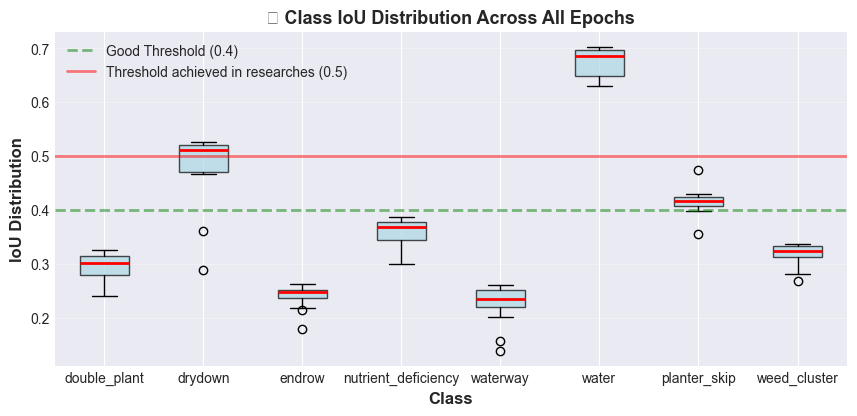

In [74]:
fig4 = plt.figure(figsize=(16, 10))
gs4 = GridSpec(2, 3, figure=fig4, hspace=0.3, wspace=0.3)
threshold = 0.4
threshold_research = 0.5

# Box plot of class IoU
ax1 = fig4.add_subplot(gs4[0, :2])
bp = ax1.boxplot(class_iou_data, labels=class_names, patch_artist=True,
                 medianprops=dict(color='red', linewidth=2),
                 boxprops=dict(facecolor='lightblue', alpha=0.7))
ax1.set_xlabel('Class', fontsize=12, fontweight='bold')
ax1.set_ylabel('IoU Distribution', fontsize=12, fontweight='bold')
ax1.set_title('📦 Class IoU Distribution Across All Epochs', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

ax1.axhline(y=threshold, color='green', linestyle='--', linewidth=2, alpha=0.5, label=f'Good Threshold ({threshold})')
ax1.axhline(y=threshold_research, color='red', linestyle='-', linewidth=2, alpha=0.5, label=f'Threshold achieved in researches ({threshold_research})')


ax1.legend(fontsize=10)

# Detailed Metrics Analysis

C:\Users\Max\AppData\Local\Temp\ipykernel_16872\2667293615.py:66: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Max\AppData\Local\Temp\ipykernel_16872\2667293615.py:66: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Max\AppData\Local\Temp\ipykernel_16872\2667293615.py:66: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Max\AppData\Local\Temp\ipykernel_16872\2667293615.py:66: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Max\AppData\Local\Temp\ipykernel_16872\2667293615.py:66: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Max\AppData\Local\pypoetry\Cache\virtualenvs\agrinet-CSzAdQDi-py3.12\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) mis

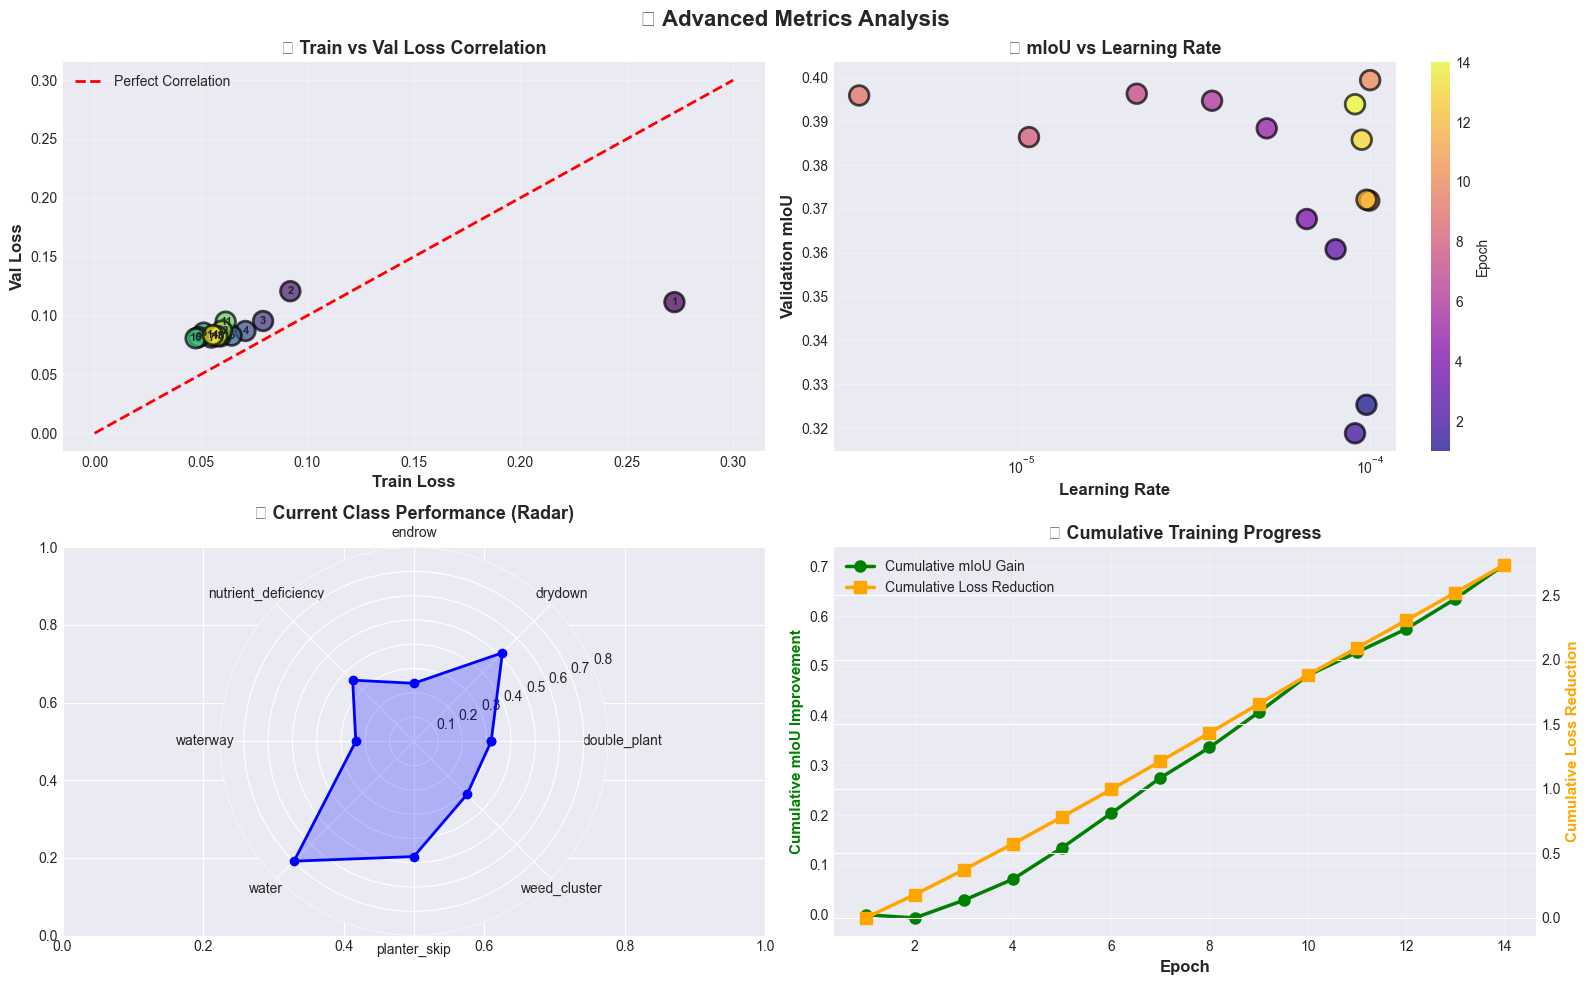

In [75]:
fig5, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Train vs Val Loss Correlation
ax1 = axes[0, 0]
ax1.scatter(df['train_loss'], df['val_loss'], c=df['epoch'], cmap='viridis', 
            s=200, edgecolors='black', linewidth=2, alpha=0.7)
for i, epoch in enumerate(df['epoch']):
    ax1.annotate(f'{epoch}', (df['train_loss'].iloc[i], df['val_loss'].iloc[i]), 
                ha='center', va='center', fontweight='bold', fontsize=8)
ax1.plot([0, 0.3], [0, 0.3], 'r--', linewidth=2, label='Perfect Correlation')
ax1.set_xlabel('Train Loss', fontsize=12, fontweight='bold')
ax1.set_ylabel('Val Loss', fontsize=12, fontweight='bold')
ax1.set_title('📍 Train vs Val Loss Correlation', fontsize=13, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# 2. mIoU vs Learning Rate
ax2 = axes[0, 1]
scatter = ax2.scatter(df['learning_rate'], df['val_miou'], c=df['epoch'], cmap='plasma', 
                     s=200, edgecolors='black', linewidth=2, alpha=0.7)
ax2.set_xlabel('Learning Rate', fontsize=12, fontweight='bold')
ax2.set_ylabel('Validation mIoU', fontsize=12, fontweight='bold')
ax2.set_title('📉 mIoU vs Learning Rate', fontsize=13, fontweight='bold')
ax2.set_xscale('log')
plt.colorbar(scatter, ax=ax2, label='Epoch')
ax2.grid(True, alpha=0.3)

# 3. Class performance radar chart (latest epoch)
ax3 = axes[1, 0]
angles = np.linspace(0, 2 * np.pi, len(class_names), endpoint=False).tolist()
values = class_iou_data[-1].tolist()
values += values[:1]
angles += angles[:1]

ax3 = plt.subplot(2, 2, 3, projection='polar')
ax3.plot(angles, values, 'o-', linewidth=2, color='blue')
ax3.fill(angles, values, alpha=0.25, color='blue')
ax3.set_xticks(angles[:-1])
ax3.set_xticklabels(class_names, fontsize=10)
ax3.set_ylim(0, 0.8)
ax3.set_title('🎯 Current Class Performance (Radar)', fontsize=13, fontweight='bold', pad=20)
ax3.grid(True)

# 4. Cumulative improvement
ax4 = axes[1, 1]
miou_improvement = (df['val_miou'] - df['val_miou'].iloc[0]).cumsum()
train_loss_reduction = (df['train_loss'].iloc[0] - df['train_loss']).cumsum()
ax4_twin = ax4.twinx()

line1 = ax4.plot(df['epoch'], miou_improvement, marker='o', linewidth=2.5, 
                 markersize=8, color='green', label='Cumulative mIoU Gain')
line2 = ax4_twin.plot(df['epoch'], train_loss_reduction, marker='s', linewidth=2.5, 
                      markersize=8, color='orange', label='Cumulative Loss Reduction')

ax4.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax4.set_ylabel('Cumulative mIoU Improvement', fontsize=11, fontweight='bold', color='green')
ax4_twin.set_ylabel('Cumulative Loss Reduction', fontsize=11, fontweight='bold', color='orange')
ax4.set_title('📈 Cumulative Training Progress', fontsize=13, fontweight='bold')
ax4.grid(True, alpha=0.3)

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax4.legend(lines, labels, loc='upper left', fontsize=10)

plt.suptitle('🔬 Advanced Metrics Analysis', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()